<a href="https://colab.research.google.com/github/devd-09/Gee_Projects/blob/main/Geospatial_Clustering_and_Visualization_of_Countries_Using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#!pip install geopandas shapely scikit-learn matplotlib contextily

In [48]:
import geopandas as gpd
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import contextily as ctx

In [49]:
shp_url = "https://github.com/devd-09/Gee_Projects/raw/main/Data_joining/world%20admin%20boundaries/world-administrative-boundaries-countries.shp"
csv_url = "https://github.com/devd-09/Gee_Projects/raw/main/Data_joining/world_population.csv"

In [50]:
gdf = gpd.read_file(shp_url)
df = pd.read_csv(csv_url)

In [51]:
gdf = gdf.loc[:, ~gdf.columns.duplicated()]
gdf["iso3_code"] = gdf["iso3_code"].astype(str).str.strip().str.upper()
df["CCA3"] = df["CCA3"].astype(str).str.strip().str.upper()
merged = gdf.merge(df, left_on="iso3_code", right_on="CCA3", how="left")
merged.to_file("/content/world_population_joined.gpkg", driver="GPKG")
print("✅ Merge complete and saved as GeoPackage")

✅ Merge complete and saved as GeoPackage


In [57]:
world_pop = gpd.read_file("/content/world_population_joined.gpkg")
world_pop.head()

,iso3_code,iso2_code,preferred_t,english_sho,french_shor,spanish_sho,russian_sho,chinese_sho,arabic_shor,region_code,...,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,geometry
0,EST,EE,Estonia,Estonia,Estonie (l') [fém.],Estonia,Эстония,爱沙尼亚,إستونيا,150,...,1331535.0,1396877.0,1570674.0,1476983.0,1361999.0,45227.0,29.3201,0.9980,0.02,"MULTIPOLYGON (((22.98485 58.59944, 23.09083 58..."
1,IRQ,IQ,Iraq,Iraq,Iraq (l') [masc.],Iraq (el),Ирак,伊拉克,العراق,142,...,31264875.0,24628858.0,17658381.0,13653369.0,9811347.0,438317.0,101.5158,1.0221,0.56,"MULTIPOLYGON (((44.78734 37.14971, 44.76617 37..."
2,AFG,AF,Afghanistan,Afghanistan,Afghanistan (l') [masc.],Afganistán (el),Афганистан,阿富汗,أفغانستان,142,...,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52,"MULTIPOLYGON (((74.91574 37.23733, 74.80873 37..."
3,ABW,AW,Aruba,Aruba,None,None,None,None,None,19,...,100341.0,89101.0,65712.0,62267.0,59106.0,180.0,591.3611,0.9991,0.00,"MULTIPOLYGON (((-69.87486 12.41528, -69.88224 ..."
4,ERI,ER,Eritrea,Eritrea,Érythrée (l') [fém.],Eritrea,Эритрея,厄立特里亚,إريتريا,2,...,3147727.0,2392880.0,2149960.0,1657982.0,1272748.0,117600.0,31.3268,1.0176,0.05,"MULTIPOLYGON (((40.13583 15.7525, 40.12861 15...."


In [58]:
years = ["2022", "2020", "2015"]
scaler = StandardScaler()

In [60]:
for year in ["2022", "2020", "2015"]:
    merged[f"density_{year}"] = merged[f"{year} Population"] / merged["Area (km²)"]

In [66]:
for year in years:
    X = merged[[f"density_{year}"]].fillna(0)
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=5, random_state=42)
    merged[f"cluster_{year}"] = kmeans.fit_predict(X_scaled)

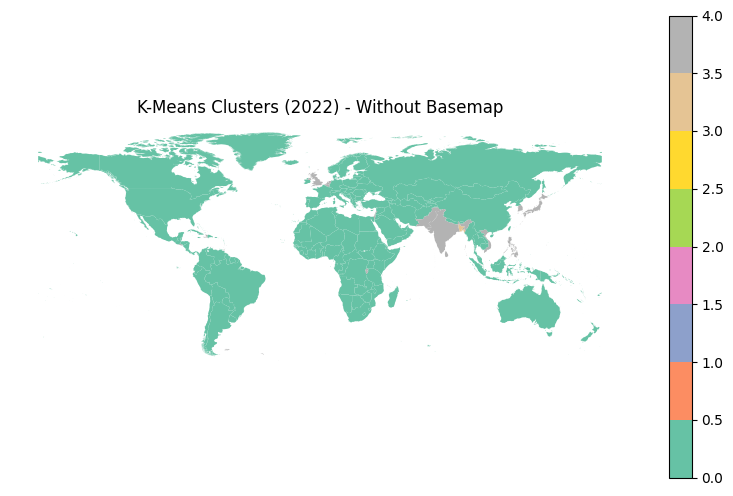

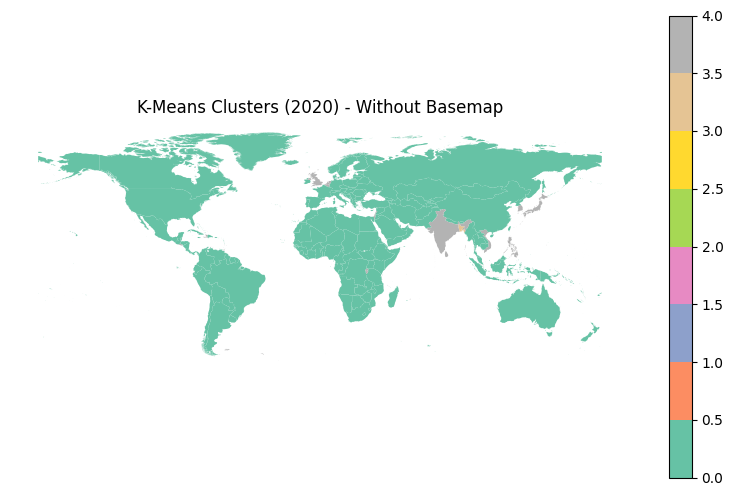

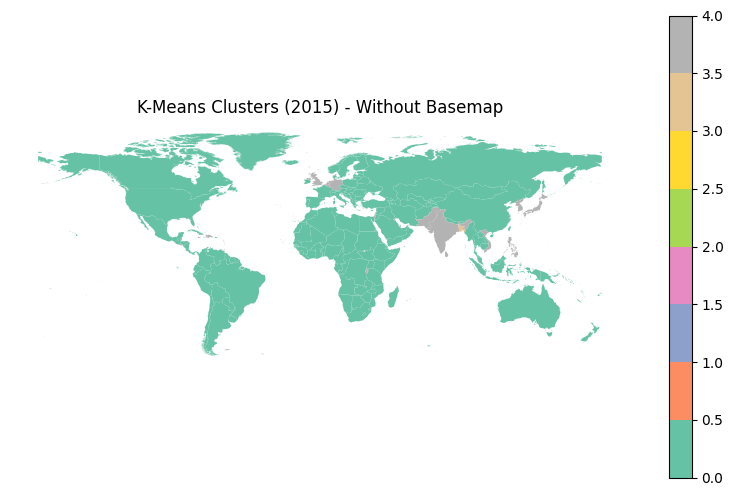

In [78]:
for year in years:
    merged.plot(column=f"cluster_{year}", legend=True, figsize=(10, 6),cmap='Set2')
    plt.title(f"K-Means Clusters ({year}) - Without Basemap")
    plt.axis("off")
    plt.show()

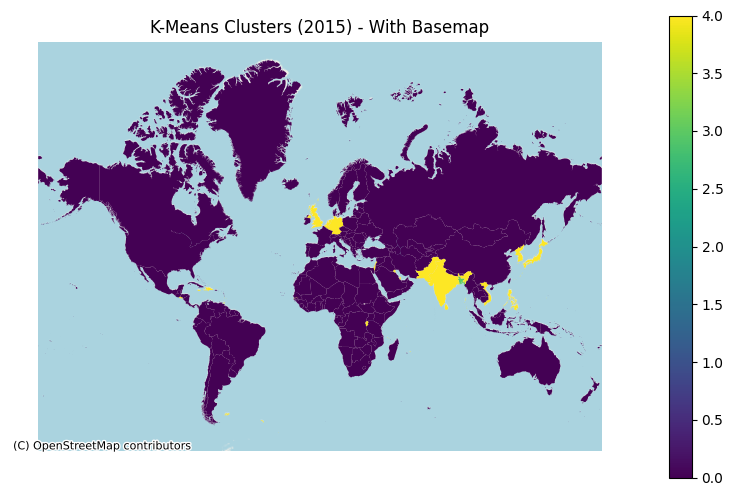

In [63]:
    merged_3857 = merged.to_crs(epsg=3857)
    ax = merged_3857.plot(column=f"cluster_{year}", figsize=(10, 6), legend=True)
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
    plt.title(f"K-Means Clusters ({year}) - With Basemap")
    plt.axis("off")
    plt.show()